In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Carregar os dados de treinamento e teste

In [2]:
X_train = pd.read_csv('../Dados/RedesNeurais/X_train.csv')
y_train = pd.read_csv('../Dados/RedesNeurais/y_train.csv')
X_test = pd.read_csv('../Dados/RedesNeurais/X_test.csv')
y_test = pd.read_csv('../Dados/RedesNeurais/y_test.csv')
X_val = pd.read_csv('../Dados/RedesNeurais/X_val.csv')
y_val = pd.read_csv('../Dados/RedesNeurais/y_val.csv')

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
y_val = y_val.values.ravel()

## 2) Pré-processando dados

### 2.1) Configurando LabelEncoder

In [3]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

### 2.2) Corrigindo dados

In [4]:
# Padronizar as características (normalização)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Converter as classes em vetores one-hot (para a camada de saída)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## 3) Experimentando diferentes redes neurais

In [5]:
architectures = [
    (32, 32),        # Exemplo de arquitetura 1
    (64, 32, 16),    # Exemplo de arquitetura 2
    (128, 64),       # Exemplo de arquitetura 3
]

hyperparameters = {
    'activation_function': ['relu', 'tanh', 'sigmoid'],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'batch_size': [32, 64, 128]
}

best_model = None
best_accuracy = 0.0
min_loss = 100

accuracies_train = []  
accuracies_test = [] 

table_data = []

### 3.1) Treinando redes neurais

In [6]:
combination_number = 1

for architecture in architectures:
    for activation_function in hyperparameters['activation_function']:
        for optimizer in hyperparameters['optimizer']:
            for batch_size in hyperparameters['batch_size']:
                    model = Sequential()
                    for units in architecture:
                        model.add(Dense(units, activation=activation_function, input_dim=X_train.shape[1]))
                    model.add(Dense(3, activation='softmax'))
                    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                    
                    history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0)

                    final_training_accuracy = history.history['accuracy'][-1]
                        
                    loss, accuracy = model.evaluate(X_val, y_val)

                    # _, test_accuracy = model.evaluate(X_test, y_test)
                    # accuracies_train.append(train_accuracy)
                    # accuracies_test.append(test_accuracy)

                    print(f'Arquitetura {architecture}:')
                    print(f'Acurácia na validação: {accuracy * 100:.2f}%')
                    print(f'Loss final: {loss * 100:.2f}%')
                    print("Hiperparâmetros:")
                    print(f'- Função de Ativação: {activation_function}')
                    print(f'- Otimizador: {optimizer}')
                    print(f'- Tamanho do Lote: {batch_size}')
                    print("----------------------------------------------------------------\n")

                    # Coletar informações da iteração atual para tabela
                    row = [combination_number, f'Arquitetura {architecture}', activation_function, optimizer, batch_size, final_training_accuracy * 100, accuracy * 100, loss * 100]
                    table_data.append(row)

                    combination_number += 1
                    
                    if accuracy > best_accuracy and loss < min_loss:
                        best_accuracy = accuracy
                        best_model = model
                        best_hyperparameters = {
                        'Arquitetura': architecture,
                        'Função de Ativação': activation_function,
                        'Otimizador': optimizer,
                        'Tamanho do Lote': batch_size
                    }

        
# Imprimir informações sobre o melhor modelo
print("Melhor Modelo:")
print(f"Acurácia na Validação: {best_accuracy * 100:.2f}%")
print("Melhores Hiperparâmetros:")
for key, value in best_hyperparameters.items():
    print(f"- {key}: {value}")

5/5 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9800
Arquitetura (32, 32):
Acurácia na validação: 98.00%
Loss final: 5.21%
Hiperparâmetros:
- Função de Ativação: relu
- Otimizador: adam
- Tamanho do Lote: 32
----------------------------------------------------------------

5/5 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9800
Arquitetura (32, 32):
Acurácia na validação: 98.00%
Loss final: 8.32%
Hiperparâmetros:
- Função de Ativação: relu
- Otimizador: adam
- Tamanho do Lote: 64
----------------------------------------------------------------

5/5 [==============================] - 0s 4ms/step - loss: 0.1657 - accuracy: 0.9667
Arquitetura (32, 32):
Acurácia na validação: 96.67%
Loss final: 16.57%
Hiperparâmetros:
- Função de Ativação: relu
- Otimizador: adam
- Tamanho do Lote: 128
----------------------------------------------------------------

5/5 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.

In [7]:
# ## 3.1) Construindo redes neurais
# for architecture in architectures:
#     model = Sequential()
#     for units in architecture:
#         model.add(Dense(units, activation='relu', input_dim=X_train.shape[1]))
#     model.add(Dense(3, activation='softmax'))  # 3 unidades na camada de saída para as três classes
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

#     train_accuracy = [acc * 100 for acc in history.history['accuracy']]

#     loss, accuracy = model.evaluate(X_val, y_val)

#     _, test_accuracy = model.evaluate(X_test, y_test)
    
#     accuracies_train.append(train_accuracy)
#     accuracies_test.append(test_accuracy)

#     print(f'Arquitetura {architecture}: Acurácia na validação: {accuracy * 100:.2f}%')
#     print(f'Arquitetura {architecture}: Loss final: {loss * 100:.2f}%')
#     print("----------------------------------------------------------------\n")

#     if accuracy > best_accuracy and loss < min_loss:
#         best_accuracy = accuracy
#         best_model = model

### 3.2) Plotando Diferenças
# plt.figure(figsize=(12, 6))

# for i, architecture in enumerate(architectures):
#     plt.plot(accuracies_train[i], label=f'Treinamento - Arquitetura {architecture}')

# plt.title('Acurácia de Treinamento')
# plt.xlabel('Épocas')
# plt.ylabel('Acurácia')
# plt.legend()

# plt.ylim(0, 100)

# test_accuracies = [accuracy * 100 for accuracy in accuracies_test]
# architecture_labels = [f'Arquitetura {architecture}' for architecture in architectures]

# plt.figure(figsize=(12, 6))
# plt.bar(architecture_labels, test_accuracies, color='dodgerblue', alpha=0.7)
# plt.title('Acurácia no Conjunto de Teste')
# plt.xlabel('Arquitetura da Rede Neural')
# plt.ylabel('Acurácia')
# plt.ylim(0, 100) 
# plt.xticks(rotation=45)

# # Adicionar os valores das barras
# for i, v in enumerate(test_accuracies):
#     plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# plt.show()


### 3.2) Tabela comparativa para todas combinações

In [8]:
headers = ['Combinação', 'Arquitetura', 'Função de Ativação', 'Otimizador', 'Tamanho do Lote', 'Train Score', ' Validation Score', 'Final Loss']
table = tabulate(table_data, headers, tablefmt='fancy_grid', numalign='left')

print(table)

╒══════════════╤══════════════════════════╤══════════════════════╤══════════════╤═══════════════════╤═══════════════╤═════════════════════╤══════════════╕
│ Combinação   │ Arquitetura              │ Função de Ativação   │ Otimizador   │ Tamanho do Lote   │ Train Score   │  Validation Score   │ Final Loss   │
╞══════════════╪══════════════════════════╪══════════════════════╪══════════════╪═══════════════════╪═══════════════╪═════════════════════╪══════════════╡
│ 1            │ Arquitetura (32, 32)     │ relu                 │ adam         │ 32                │ 99.4286       │ 98                  │ 5.21194      │
├──────────────┼──────────────────────────┼──────────────────────┼──────────────┼───────────────────┼───────────────┼─────────────────────┼──────────────┤
│ 2            │ Arquitetura (32, 32)     │ relu                 │ adam         │ 64                │ 98.5714       │ 98                  │ 8.32078      │
├──────────────┼──────────────────────────┼──────────────────────┼────

## 4) Avaliando melhor rede neural

In [9]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Melhor modelo - Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

5/5 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9933
Melhor modelo - Acurácia no conjunto de teste: 99.33%


### 4.1) Predição do melhor modelo

In [10]:
y_pred = best_model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


### 4.2) Matriz Confusão

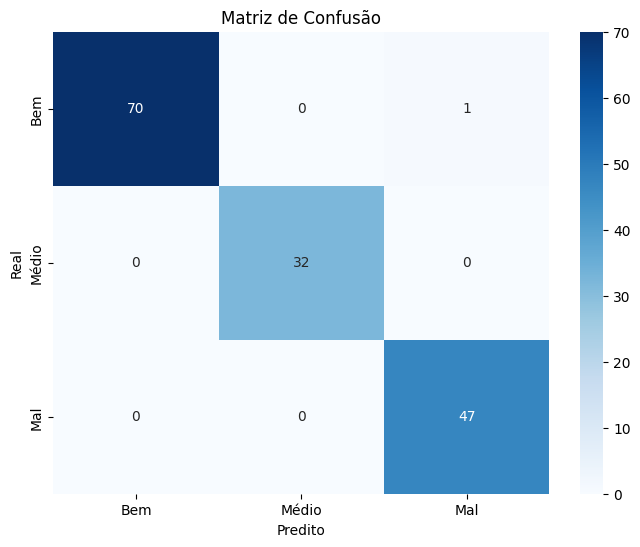

In [11]:
# Transformar as previsões de volta para as classes originais
y_pred_classes = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
y_test_classes = label_encoder.inverse_transform(np.argmax(y_test, axis=1))


cm = confusion_matrix(y_test_classes, y_pred_classes)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### 4.3) Métricas de eficácia

In [12]:
print("----------------------------------------------------------------")
accuracy = accuracy_score(y_test_classes, y_pred_classes)  
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test_classes, y_pred_classes)
print(f'Relatório de Classificação:\n{classification_rep}')


# precision = precision_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Medida F: {f1}')

----------------------------------------------------------------
Acurácia no conjunto de teste: 99.33%
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       1.00      1.00      1.00        32
           2       0.98      1.00      0.99        47

    accuracy                           0.99       150
   macro avg       0.99      1.00      0.99       150
weighted avg       0.99      0.99      0.99       150



## A) OBS: Rede Neural Unica

In [13]:
neuralNetwork = Sequential()
neuralNetwork.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
neuralNetwork.add(Dense(32, activation='relu'))
neuralNetwork.add(Dense(3, activation='softmax'))  # 3 unidades na camada de saída para as três classes

neuralNetwork.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

neuralNetwork.fit(X_train, y_train, epochs=100, batch_size=32)

y_pred = neuralNetwork.predict(X_test)

test_loss, test_accuracy = neuralNetwork.evaluate(X_test, y_test)
print(f'Melhor modelo - Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.9973 - accuracy: 0.5200
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7219 - accuracy: 0.7957
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.5429 - accuracy: 0.7943
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8243
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8586
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8771
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2906 - accuracy: 0.9029
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.9157
Epoch 9/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9257
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2077 - accuracy: 0.9371
Epoch 11/

## A.1) Matriz Confusão

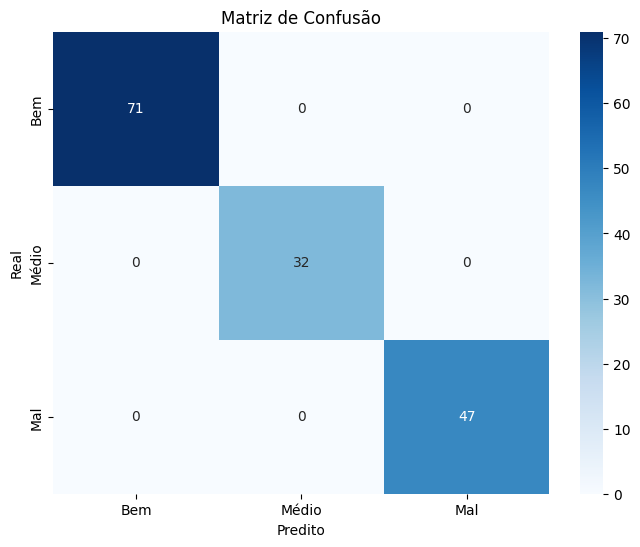

In [14]:
# Transformar as previsões de volta para as classes originais
y_pred_classes = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))
y_test_classes = label_encoder.inverse_transform(np.argmax(y_test, axis=1))


cm = confusion_matrix(y_test_classes, y_pred_classes) 

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## A.2) Métricas de eficácia

In [15]:
print("----------------------------------------------------------------")
accuracy = accuracy_score(y_test_classes, y_pred_classes)  
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test_classes, y_pred_classes)
print(f'Relatório de Classificação:\n{classification_rep}')


# precision = precision_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Medida F: {f1}')

----------------------------------------------------------------
Acurácia no conjunto de teste: 100.00%
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        47

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

